In [2]:
import pandas as pd

In [3]:
df= pd.read_csv("C://Users//akhil//Desktop//HAP 880//Week 1//highUtilizationPredictionV2wco.csv")

In [4]:
df.head()

,race,age,patient_id,ELIX1,ELIX2,ELIX3,ELIX4,ELIX5,ELIX6,ELIX7,...,drugs_m4-5,drugs_m5-6,drugs_m6-7,drugs_m7-8,drugs_m8-9,drugs_m9-10,drugs_m10-11,drugs_m11-12,HighUtilizationY2,claimCount
0,B,71,PAT136597,0,0,0,0,0,1,0,...,0,1,4,2,1,3,1,1,1,160
1,A,86,PAT119838,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
2,W,70,PAT11289,1,0,0,0,0,0,0,...,4,2,2,0,6,2,1,0,0,52
3,W,75,PAT178745,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,15
4,W,77,PAT50922,0,0,0,0,1,0,0,...,4,3,4,4,4,3,4,4,0,66


In [5]:
cls = df.columns.tolist()

In [6]:
cls.remove('race')
cls.remove('patient_id')
cls.remove('HighUtilizationY2')
cls.remove('claimCount')

In [7]:
df1 = df[cls]
label = df.HighUtilizationY2

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
df1=df1.fillna(0)
label=label.fillna(0)

In [10]:
xtr,xts,ytr,yts = train_test_split(df1,label)

In [11]:
lr = LogisticRegression()

In [12]:
lr.fit(xtr,ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
lr.coef_

array([[-0.0153703 ,  0.16322814,  0.42389216,  0.30182937,  0.03833984,
         0.11508896,  0.66952559,  0.01504228,  0.10751252,  0.26673591,
         0.95115749, -0.152413  ,  0.12550178,  0.29019168,  0.55799626,
        -0.02403442,  0.23027348,  0.20061143,  0.07051239, -0.10648872,
        -0.14139897,  0.45589257,  0.57398819, -0.07579497,  0.01581758,
         0.10461929, -0.072983  ,  0.23853897,  0.12377726,  0.16036326,
         0.17655889, -0.11176681, -0.00377018, -0.18901871,  0.42721684,
         0.16256298, -0.11526237, -0.1029253 , -0.00451619,  0.35345254,
         0.33560836,  0.69744925,  0.20582573, -0.00468067,  0.29085755,
         0.22583841,  0.16973761, -0.00105051,  0.21552307,  0.33045394,
         0.4647531 , -0.00427495, -0.02620523, -0.01199708, -0.01087416,
         0.00175864, -0.0045719 , -0.00563626, -0.00196669,  0.00727628,
        -0.0073132 ,  0.03953143,  0.02550421,  0.08537019]])

In [14]:
probs=lr.predict_proba(xts)[:,1]

In [15]:
output = lr.predict(xts)

In [16]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [17]:
fpr, tpr, thresholds = roc_curve(yts, probs)

In [18]:
auc(fpr,tpr)

0.8171558313425951

In [19]:
get_ipython().magic('matplotlib inline')

In [20]:
from matplotlib import pyplot as plt

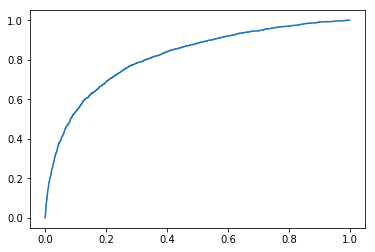

In [21]:
plt.plot(fpr,tpr)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(n_estimators=100)

In [24]:
rf.fit(xtr, ytr)
rf_probs = rf.predict_proba(xts)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(yts, rf_probs[:,1])
auc(rf_fpr, rf_tpr)

0.7987168038242047

#Comparing AUC for logistic regression and random forest 

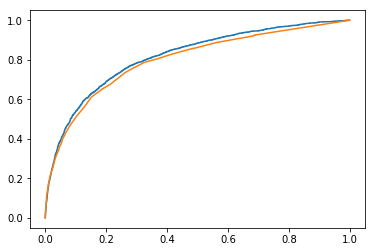

In [25]:
plt.plot(fpr,tpr)
plt.plot(rf_fpr,rf_tpr)

In [26]:
r2 = pd.read_json("C://Users//akhil//Desktop//HAP 880//Week 1//Assignment 1\\r2.json")
r2t = r2.T[cls]
print(lr.predict_proba(r2t)[:,1])
print(lr.predict(r2t))

[7.41010976e-08]
[0]


In [27]:
r4 = pd.read_json("C://Users//akhil//Desktop//HAP 880//Week 1//Assignment 1\\r4.json")
r4t = r4.T[cls]
print(lr.predict_proba(r4t)[:,1])
print(lr.predict(r4t))

[0.09563294]
[0]


#Since R3 doesnot have the variable ELIX5 : Again trining the model without ELXI5

In [28]:
clsnew = df.columns.tolist()

In [29]:
clsnew.remove('race')
clsnew.remove('patient_id')
clsnew.remove('HighUtilizationY2')
clsnew.remove('claimCount')
clsnew.remove('ELIX5')

In [30]:
df2 = df[clsnew]
label = df.HighUtilizationY2

In [31]:
xtr2,xts2,ytr2,yts2 = train_test_split(df2,label)

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(xtr2,ytr2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
probs=lr.predict_proba(xts2)[:,1]

In [36]:
r3 = pd.read_json("C://Users//akhil//Desktop//HAP 880//Week 1//Assignment 1\\r3.json")
r3t = r3.T[clsnew]

In [37]:
r3t

,age,ELIX1,ELIX2,ELIX3,ELIX4,ELIX6,ELIX7,ELIX8,ELIX9,ELIX10,...,drugs_m2-3,drugs_m3-4,drugs_m4-5,drugs_m5-6,drugs_m6-7,drugs_m7-8,drugs_m8-9,drugs_m9-10,drugs_m10-11,drugs_m11-12
0,69,0,0,Yes,0,0,0,0,1,0,...,1,2,1,1,0,3,1,1,1,3


In [38]:
r3t = r3t.set_value(0,'ELIX3', 1)

C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


In [39]:
r3t

,age,ELIX1,ELIX2,ELIX3,ELIX4,ELIX6,ELIX7,ELIX8,ELIX9,ELIX10,...,drugs_m2-3,drugs_m3-4,drugs_m4-5,drugs_m5-6,drugs_m6-7,drugs_m7-8,drugs_m8-9,drugs_m9-10,drugs_m10-11,drugs_m11-12
0,69,0,0,1,0,0,0,0,1,0,...,1,2,1,1,0,3,1,1,1,3


In [40]:
print(lr.predict_proba(r3t))

[[0.98515777 0.01484223]]


In [41]:
print(lr.predict(r3t))

[0]


In [42]:
rf = RandomForestClassifier(n_estimators=100)

In [47]:
rf.fit(xtr2,ytr2)
rf_probs = rf.predict_proba(r3t)

In [51]:
print(rf_probs)

[[1. 0.]]


In [49]:
print(rf.predict(r3t))

[0]


#We can conclude that the three patients are not highutilizers 